In [1]:
#get aws keys
import csv
with open('private/accessKeys.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for line in readCSV:
        access_key = line[0]
        secret_key = line[1]

In [3]:
#use pyathenajdbc to query an athena table
from pyathenajdbc import connect
import pandas as pd
import numpy as np
connection = connect(access_key=access_key, secret_key=secret_key, s3_staging_dir='s3://spark-one-off/pyathena/',
    region_name='us-west-2')

In [4]:
#read train table into dataframe...is slow, likely due to pyathenajdbc
query = 'select * from oneoff.train'
train = pd.read_sql(query, connection)
print train.dtypes
train.head(5)

,id,ran_num,class,xscore,oscore,bscore,x0,y0,x,y
0,0,0.122620,B,0.0,0.0,1.0,-3.846538,3.089180,-4.464895,2.781808
1,1,0.821022,B,0.0,0.0,1.0,-0.428329,-4.657422,-0.360986,-5.246513
2,2,0.778991,B,0.0,0.0,1.0,-5.073778,0.813540,-4.805528,0.802994
3,3,0.978655,O,0.0,1.0,0.0,-2.483190,0.810874,-2.889312,0.455883
4,4,0.535148,B,0.0,0.0,1.0,-1.646670,3.700171,-1.596359,3.538368


In [6]:
#get indices of X, O and B classes
idx_x = train['class'] == 'X'
idx_o = train['class'] == 'O'
idx_b = train['class'] == 'B'
print 'X fraction = ', idx_x.sum()*1.0/len(idx_x)
print 'O fraction = ', idx_o.sum()*1.0/len(idx_o)
print 'B fraction = ', idx_b.sum()*1.0/len(idx_b)
print 'B/X ratio = ', idx_b.sum()*1.0/idx_x.sum()

X fraction =  0.136333333333
O fraction =  0.129333333333
B fraction =  0.734333333333
B/X ratio =  5.38630806846


In [8]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.2, font='DejaVu Sans')

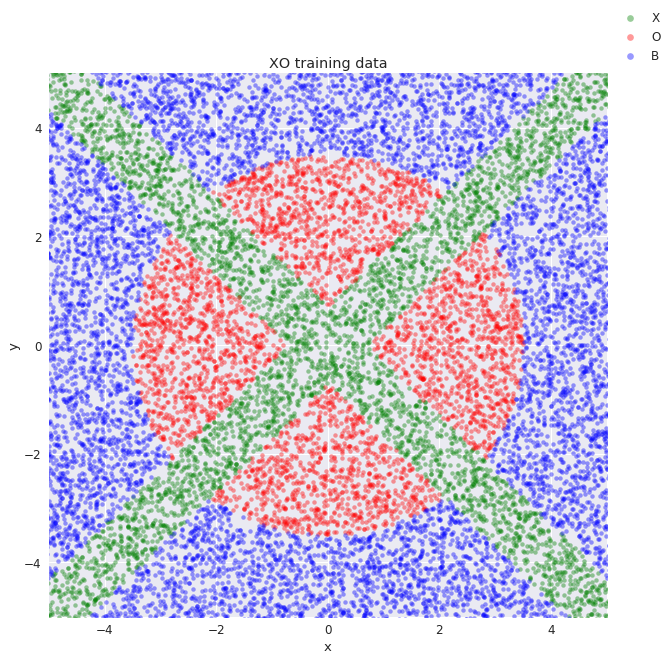

In [10]:
#scatterplot of training data having no jitter
f, ax = plt.subplots(figsize=(10, 10))
df = train
clr = 'green'
idx = idx_x
xp = df['x0'][idx]
yp = df['y0'][idx]
p = sns.regplot(xp, yp, ax=ax, fit_reg=False, scatter_kws={'alpha':0.4, 's': 20}, color=clr, label='X')
clr = 'red'
idx = idx_o
xp = df['x0'][idx]
yp = df['y0'][idx]
sns.regplot(xp, yp, ax=p, fit_reg=False, scatter_kws={'alpha':0.4, 's': 20}, color=clr, label='O')
clr = 'blue'
idx = idx_b
xp = df['x0'][idx]
yp = df['y0'][idx]
sns.regplot(xp, yp, ax=p, fit_reg=False, scatter_kws={'alpha':0.4, 's': 20}, color=clr, label='B')
p.set_title('XO training data')
p.set_xlabel('x')
p.set_ylabel('y')
p.set_xlim(-5.0, 5.0)
p.set_ylim(-5.0, 5.0)
scat_plot = p.legend(bbox_to_anchor=(1.0, 1.0), markerscale=1.5)